# Regression Modeling in Practice
# Assignment: Test a Basic Linear Regression Model

Following is the Python program I wrote to fulfill the third assignment of the [Regression Modeling in Practice online course](https://www.coursera.org/learn/regression-modeling-practice).

I decided to use [Jupyter Notebook](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb) as it is a pretty way to write code and present results.

## Assignment research question

Using the [Gapminder database](http://www.gapminder.org/), I would like to see if there is a linear relationship between the income per person (explanatory variable) and the residential consumption of electricity (response variable).


## Data management

For the question I'm interested in, the countries for which data are missing will be discarded. As missing data in Gapminder database are replace directly by `NaN` no special data treatment is needed.

In [1]:
# Magic command to insert the graph directly in the notebook
%matplotlib inline
# Load a useful Python libraries for handling data
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [2]:
# Read the data
data_filename = r'gapminder.csv'
data = pd.read_csv(data_filename, low_memory=False)
data = data.set_index('country')

General information on the Gapminder data

In [3]:
display(Markdown("Number of countries: {}".format(len(data))))
display(Markdown("Number of variables: {}".format(len(data.columns))))

Number of countries: 213

Number of variables: 15

# Variables distribution

Before computing the linear regression between the icome per person and the residential electricity consumption, let's have a look at the distributions of the variables.

In [4]:
subdata2 = (data[['incomeperperson', 'relectricperperson']]
                .assign(income=lambda x: pd.to_numeric(data['incomeperperson'], errors='coerce'),
                        electricity=lambda x: pd.to_numeric(data['relectricperperson'], errors='coerce'))
                .dropna())

### Income per person

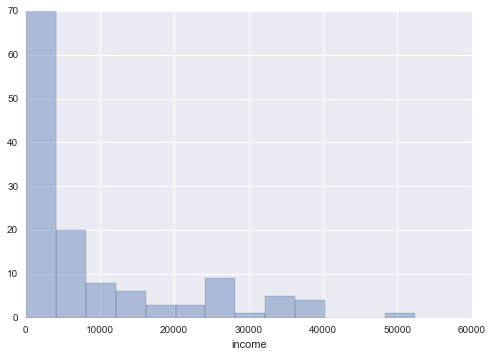

In [5]:
sns.distplot(subdata2['income'], kde=False)
plt.xlabel('Income per person (2000 US$)');

From the distribution graph, we can see that the distribution is skewed-right and bimodal. There is also a singular case with high income per capita. That country is :

In [13]:
subdata2.loc[subdata2['income'] > 45000]

,incomeperperson,relectricperperson,electricity,income
country,,,,
Luxembourg,52301.5871789984,1566.10613860734,1566.106139,52301.587179


In [15]:
subdata2['income'].describe()

count      130.000000
mean      8784.531620
std      11420.725637
min        103.775857
25%       1156.551493
50%       3172.679153
75%      11606.578377
max      52301.587179
Name: income, dtype: float64

For this assignment the explanatory variable *income per person* will have to be centered as its mean is 8784.5.

### Residential electricity consumption

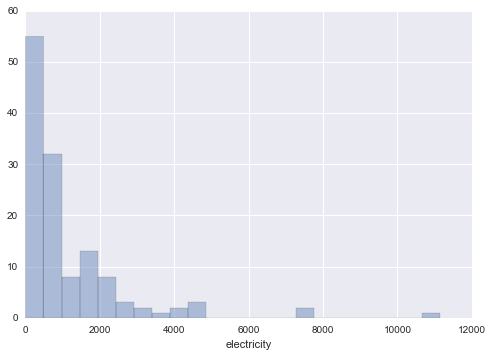

In [6]:
sns.distplot(subdata2['electricity'], kde=False)
plt.xlabel('Residential electricity consumption (kWh)');

In [16]:
subdata2['electricity'].describe()

count      130.000000
mean      1148.615676
std       1584.959430
min          0.000000
25%        226.318460
50%        609.335172
75%       1484.702878
max      11154.755033
Name: electricity, dtype: float64

The residential electricity consumption is also skewed-right. And there are also a couple of countries presenting *unusual* higher values. Those countries are :

In [19]:
subdata2.loc[subdata2['electricity'] > 6000]

,incomeperperson,relectricperperson,electricity,income
country,,,,
Bahrain,12505.2125447354,7314.3556367342,7314.355637,12505.212545
Norway,39972.3527684608,7432.13085189506,7432.130852,39972.352768
United Arab Emirates,21087.3941247583,11154.7550328078,11154.755033,21087.394125


### Bivariate distribution

If we look now at the distribution of the two variables in a scatter plot. We can see that our singular countries for the two variables of study result in outlier points. Nothing special was done about them as there are no managment error on them and no reason to discard them.
Moreover, the distribution of the data along the regression line shows that the homoscedasticity hypothesis is not well met as the spread of the data along the line is bigger for higher values of *income*.

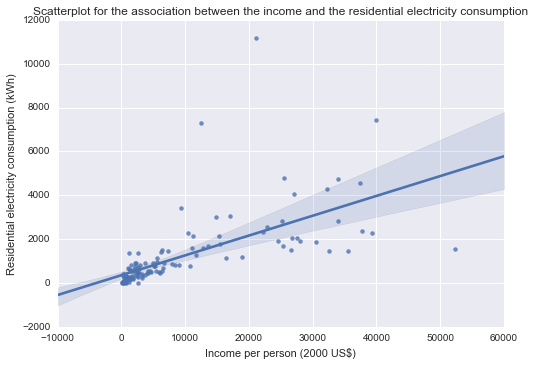

In [7]:
sns.regplot(x='income', y='electricity', data=subdata2)
plt.xlabel('Income per person (2000 US$)')
plt.ylabel('Residential electricity consumption (kWh)')
plt.title('Scatterplot for the association between the income and the residential electricity consumption');

## Centering the explanatory variable

For the assignment, the explanatory variable (here the *income per person*) has to be centered by subracting its mean.

Income mean after centereing : -1.88895e-12

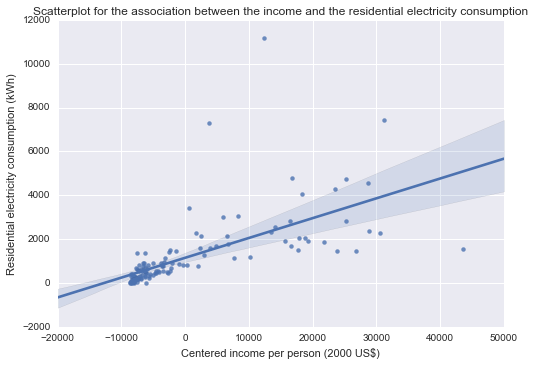

In [20]:
subdata3 = subdata2.assign(income_centered=lambda x: x['income']-subdata2['income'].mean())

display(Markdown("Income mean after centereing : {:3g}".format(subdata3['income_centered'].mean())))

sns.regplot(x='income_centered', y='electricity', data=subdata3)

plt.xlabel('Centered income per person (2000 US$)')
plt.ylabel('Residential electricity consumption (kWh)')
plt.title('Scatterplot for the association between the income and the residential electricity consumption');

## OLS regression model

In [9]:
reg1 = smf.ols('electricity ~ income_centered', data=subdata3).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     94.47
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           4.63e-17
Time:                        13:37:53   Log-Likelihood:                -1105.9
No. Observations:                 130   AIC:                             2216.
Df Residuals:                     128   BIC:                             2222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1148.6157    105.855     10.851      0.000       939.164  1358.067
income_centered     0.0904      0.009      9.719      0.000         0.072     0.109
==============================================================================
Omnibus:                      148.000   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.319
Skew:                           4.030   Prob(JB):                         0.00
Kurtosis:                      29.232   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion

From the OLS analysis above, there is a significant positive linear relationship between *income per person* and *residential electricity consumption*. The slope coefficient is 0.0904. And the p-value is far below 0.05.